In [138]:
##pip install plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,10.27)})

# Для выполнения работы использую датасет с Kaggle https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
## В нем данные по зарплатам аналитиков в разных странах мира и с разными грейдами и позициями

In [7]:
# грузим файл и удаляем лишнюю техническую колонку
df = pd.read_csv ('ds_salaries.csv')
df = df.drop(df.columns[0], axis=1)

In [140]:
# добавим колонку с кодированием строковых значений грейдов, для дальнейшего анализа. Где джун будет иметь значение 1, а руководитель 4
df['experience_level_num'] = df['experience_level']
di = { "EN":1, 'MI':2,"SE":3,"EX":4 }
df['experience_level_num'].replace(di, inplace=True)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_num
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,2
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,3
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,3
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,2
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,3


# Визуализация 1 Pie Chart

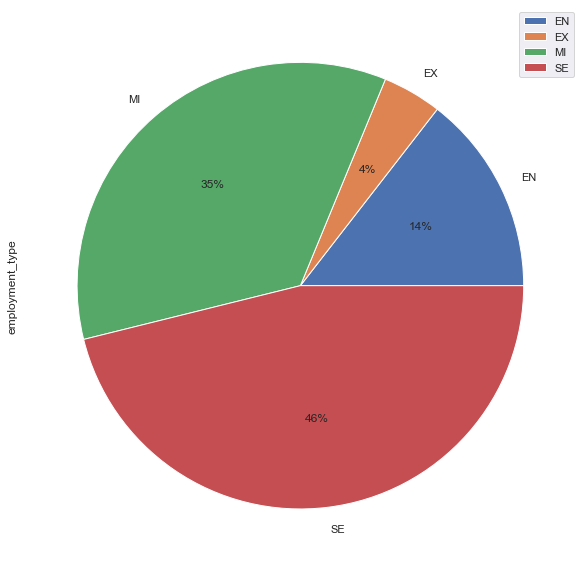

In [94]:
df.groupby(['experience_level']).count().plot(kind='pie', y='employment_type', autopct='%1.0f%%')


### На рисунке выше
##### EN - Entry-leve
##### SE - Senior
##### MI- Mid-level
##### EX - Executive-level

### Из графика видно, что большую часть специалистов в исследовании занимают специалисты уровня Sinior и Middle. Привел дополнительно статистику,  что процент таких людей = 80

# Визуализация 2 Box Plot

[Text(0, 0, '-100,000.0K'),
 Text(0, 0, '0.0K'),
 Text(0, 0, '100,000.0K'),
 Text(0, 0, '200,000.0K'),
 Text(0, 0, '300,000.0K'),
 Text(0, 0, '400,000.0K'),
 Text(0, 0, '500,000.0K'),
 Text(0, 0, '600,000.0K'),
 Text(0, 0, '700,000.0K')]

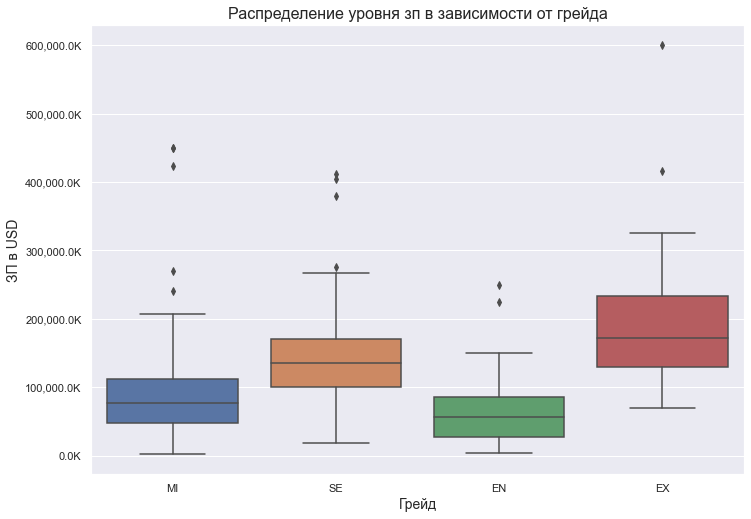

In [59]:
boxplot = sns.boxplot(x="experience_level", y="salary_in_usd", data=df);
boxplot.axes.set_title("Распределение уровня зп в зависимости от грейда", fontsize=16)
boxplot.set_xlabel("Грейд", fontsize=14)
boxplot.set_ylabel("ЗП в USD", fontsize=14);
ylabels = ['{:,}'.format(x) + 'K' for x in boxplot.get_yticks()]
boxplot.set_yticklabels(ylabels)

### На рисунке выше


### Из графика видно, ЗП привязана к грейду в общем случае, но есть случаи, когда зп более младшего грейда выше, чем более старшего
### Так же видно, что у руководитель, довольно широкий межквартильный размах. Что и логично. Так как зп руководителя сверху никак не ограничены сеткой

# Визуализация 3 Тепловая карта (Матрица корреляций)

Text(0.5, 1.0, 'Матрица корреляций')

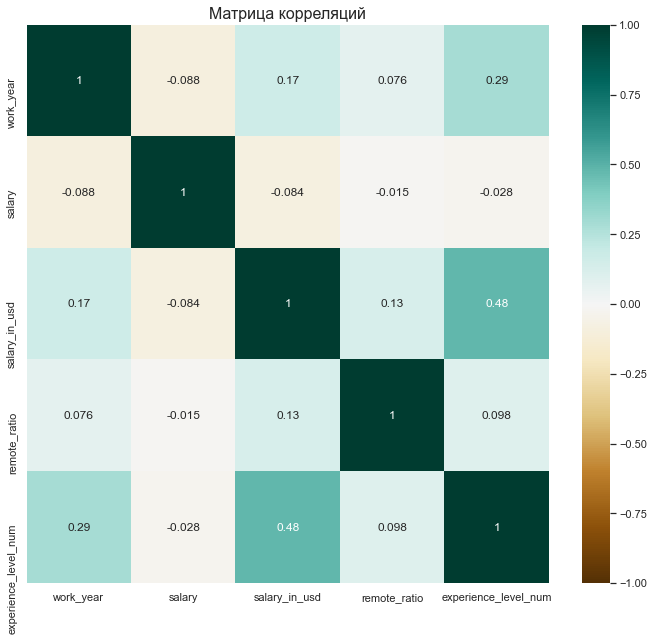

In [83]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.axes.set_title("Матрица корреляций", fontsize=16)

### На рисунке выше изображена матрица корреляций. Для наглядности я закодировал переменную "грейд" числовыми значениями "experience_level_num"
### Из матрицы отчетливо видна только одна зависимость между грейдом и зп в долларах. Что в общем-то логично. Но интересно, что значение коэффициента находится на среднем уровне, что подтверждает нашу гипотезу выше, о том, что бывают случаи, когда более низкий грейд получает больше чем более высокий

# Визуализация 4 Bubble chart

In [141]:
df.loc[df['column_name'] == some_value]

In [150]:
## выбираем грейд для визуализаци
experience_level = 'MI'

## Подготовим датасет для визуализации, добавим техническу колонку, чтобы сделать кружки на визуализации большими
df_bubble = df.loc[df['experience_level'] == experience_level].groupby(['job_title']).agg({'salary_in_usd': ['mean', 'count']}).reset_index().set_axis(['job_title', 'mean_salary', 'qty'], axis=1, inplace=False)
df_bubble['size'] = 100


##Рисуем график
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df_bubble, x="qty", y="mean_salary", color="job_title", size='size', hover_name="job_title",labels={
                     "mean_salary": "Средняя зп",
                     "qty": "Объем рынка",
                     "job_title": "Название должности"
                 },
                title="Зарплаты и рынок труда")
fig.show()

## На графике выше мы видим Бабл чарт. Где для разных должностей показана объем рынка и средняя зп. Для корректности сравнения есть фильтр по грейдам, так как нужно сравнивать яблоки с яблоками.
## Неожаданно ,что у финансовых аналитиков очень большие зп , при этом рынок специалистов не очень большой. Очень много вакансий дата инженеров, DS и аналитиков данных, при этом зп там не очень большие. По этой визуализации начинающий специалист может понять для себя каков сейчас рынок, сколько за что платят и где самые лакомые позиции